In [1]:
#Importing libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pylab as plt
import plotly.express as px
from matplotlib.ticker import FuncFormatter
plt.style.use('ggplot')

In [2]:
df_temp = pd.read_csv('/kaggle/input/co-and-greenhouse-gas-emissions/1- temperature-anomaly.csv')
df_emission_region = pd.read_csv('/kaggle/input/co-and-greenhouse-gas-emissions/2- annual-co-emissions-by-region.csv')
df_emission_per_cap = pd.read_csv('/kaggle/input/co-and-greenhouse-gas-emissions/3- co-emissions-per-capita.csv')

Step 1: Understadning the data 
* Dataframe shape
* head an tail 
* dtypes
* describle 

In [3]:
df_temp.shape


(522, 6)

In [4]:
df_emission_region.shape

(30308, 4)

In [5]:
df_emission_per_cap.shape

(26600, 4)

In [6]:
df_temp.head()

Entity  Code  Year  \
0  Global   NaN  1850   
1  Global   NaN  1851   
2  Global   NaN  1852   
3  Global   NaN  1853   
4  Global   NaN  1854   

   Global average temperature anomaly relative to 1961-1990  \
0                                          -0.417659          
1                                          -0.233350          
2                                          -0.229399          
3                                          -0.270354          
4                                          -0.291630          

   Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.246115                         
1                                          -0.054832                         
2                                          -0.049416                         
3                                          -0.110700                         
4                                          -0.150436                         

   Lower bound of the annual temperature anomaly (95% confidence interval)  
0                                          -0.589203                        
1                                          -0.411868                        
2                                          -0.409382                        
3                                          -0.430009                        
4                                          -0.432824

In [7]:
df_temp.tail()

Entity  Code  Year  \
517  Southern hemisphere   NaN  2019   
518  Southern hemisphere   NaN  2020   
519  Southern hemisphere   NaN  2021   
520  Southern hemisphere   NaN  2022   
521  Southern hemisphere   NaN  2023   

     Global average temperature anomaly relative to 1961-1990  \
517                                           0.638402          
518                                           0.569861          
519                                           0.445762          
520                                           0.502866          
521                                           0.755306          

     Upper bound of the annual temperature anomaly (95% confidence interval)  \
517                                           0.691337                         
518                                           0.622008                         
519                                           0.499180                         
520                                           0.557362                         
521                                           0.838973                         

     Lower bound of the annual temperature anomaly (95% confidence interval)  
517                                           0.585467                        
518                                           0.517714                        
519                                           0.392344                        
520                                           0.448371                        
521                                           0.671640

In [8]:
df_temp['Entity'].unique()

array(['Global', 'Northern hemisphere', 'Southern hemisphere'],
      dtype=object)

In [9]:
df_emission_region.head()

Entity Code  Year  Annual CO₂ emissions
0  Afghanistan  AFG  1949               14656.0
1  Afghanistan  AFG  1950               84272.0
2  Afghanistan  AFG  1951               91600.0
3  Afghanistan  AFG  1952               91600.0
4  Afghanistan  AFG  1953              106256.0

In [10]:
df_emission_per_cap.head()

Entity Code  Year  Annual CO₂ emissions (per capita)
0  Afghanistan  AFG  1949                           0.001992
1  Afghanistan  AFG  1950                           0.011266
2  Afghanistan  AFG  1951                           0.012098
3  Afghanistan  AFG  1952                           0.011946
4  Afghanistan  AFG  1953                           0.013685

In [11]:
df_temp.dtypes

Entity                                                                      object
Code                                                                       float64
Year                                                                         int64
Global average temperature anomaly relative to 1961-1990                   float64
Upper bound of the annual temperature anomaly (95% confidence interval)    float64
Lower bound of the annual temperature anomaly (95% confidence interval)    float64
dtype: object

In [12]:
df_emission_per_cap.dtypes

Entity                                object
Code                                  object
Year                                   int64
Annual CO₂ emissions (per capita)    float64
dtype: object

In [13]:
df_temp.describe()

Code         Year  \
count   0.0   522.000000   
mean    NaN  1936.500000   
std     NaN    50.276825   
min     NaN  1850.000000   
25%     NaN  1893.000000   
50%     NaN  1936.500000   
75%     NaN  1980.000000   
max     NaN  2023.000000   

       Global average temperature anomaly relative to 1961-1990  \
count                                         522.000000          
mean                                           -0.072792          
std                                             0.387320          
min                                            -0.701569          
25%                                            -0.354566          
50%                                            -0.193912          
75%                                             0.110119          
max                                             1.275727          

       Upper bound of the annual temperature anomaly (95% confidence interval)  \
count                                         522.000000                         
mean                                            0.038905                         
std                                             0.347909                         
min                                            -0.486698                         
25%                                            -0.199500                         
50%                                            -0.056851                         
75%                                             0.208315                         
max                                             1.333305                         

       Lower bound of the annual temperature anomaly (95% confidence interval)  
count                                         522.000000                        
mean                                           -0.184489                        
std                                             0.432559                        
min                                            -0.947684                        
25%                                            -0.521331                        
50%                                            -0.294819                        
75%                                             0.052181                        
max                                             1.236863

In [14]:
df_emission_region.describe()

Year  Annual CO₂ emissions
count  30308.000000          3.030800e+04
mean    1940.191336          3.912722e+08
std       65.510232          1.855825e+09
min     1750.000000          0.000000e+00
25%     1902.000000          1.832000e+05
50%     1959.000000          3.856092e+06
75%     1991.000000          4.727752e+07
max     2022.000000          3.714979e+10

In [15]:
df_emission_per_cap.describe()

Year  Annual CO₂ emissions (per capita)
count  26600.000000                       26600.000000
mean    1949.096880                           3.711042
std       56.387496                          14.295633
min     1750.000000                           0.000000
25%     1915.000000                           0.132211
50%     1963.000000                           0.933317
75%     1994.000000                           4.150357
max     2022.000000                         771.886500

Step 2: Data Preparation

* Dropping irrelevant columns and rows
* Identifying duplicated columns
* Renaming Columns
* Feature Creation

In [16]:
df_emission_region.columns

Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions'], dtype='object')

In [17]:
df_emission_per_cap.columns

Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions (per capita)'], dtype='object')

In [18]:
# Removing use columns

df_emission_region = df_emission_region [['Entity', 
                                          'Code', 
                                          'Year', 
                                          'Annual CO₂ emissions']]

In [19]:
df_emission_per_cap = df_emission_per_cap [['Entity', 
                                            'Code', 
                                            'Year',
                                            'Annual CO₂ emissions (per capita)']]

In [20]:
# Renaming the columns for df_emission_region 

df_emission_region = df_emission_region.rename(columns ={'Entity': 'Country'})

In [21]:
# Renaming the columns for df_emission_per_Cap

df_emission_per_cap = df_emission_per_cap.rename(columns ={'Entity': 'Country'})

In [22]:
df_emission_region.head()

Country Code  Year  Annual CO₂ emissions
0  Afghanistan  AFG  1949               14656.0
1  Afghanistan  AFG  1950               84272.0
2  Afghanistan  AFG  1951               91600.0
3  Afghanistan  AFG  1952               91600.0
4  Afghanistan  AFG  1953              106256.0

In [23]:
#Check to see if df_emission_region has null value 
df_emission_region.isna().sum()

Country                    0
Code                    6151
Year                       0
Annual CO₂ emissions       0
dtype: int64

In [24]:
#Check to see if df_emission_per_capital has null value
df_emission_per_cap.isna().sum()

Country                                 0
Code                                 3554
Year                                    0
Annual CO₂ emissions (per capita)       0
dtype: int64

In [25]:
# Check to see if there any duplicated records 
df_emission_region.duplicated().sum()

0

In [26]:
df_emission_per_cap.duplicated().sum()

0

Step 3: Feature Understanding

(Univariate analysis)

Plotting Feature Distribution Histogram KDE Boxplot

Text(0.5, 0, 'Annual Co2 emission')

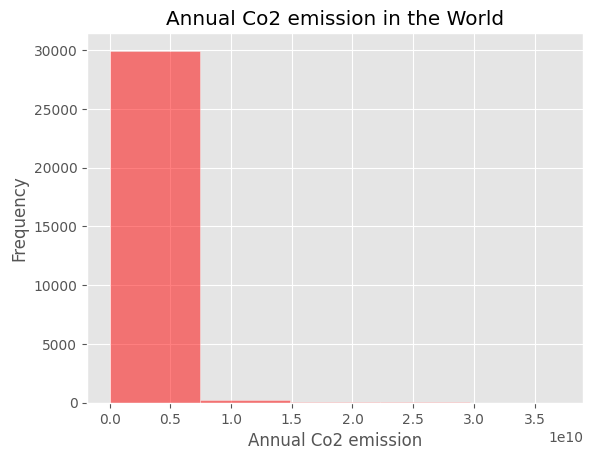

In [27]:
ax = df_emission_region['Annual CO₂ emissions']\
    .plot(kind = 'hist', 
          bins = 5,
         title = 'Annual Co2 emission in the World',
         color = 'red', 
         edgecolor = 'white',
         alpha = 0.5)
ax.set_xlabel('Annual Co2 emission')

Text(0.5, 0, 'Annual Co2 emission')

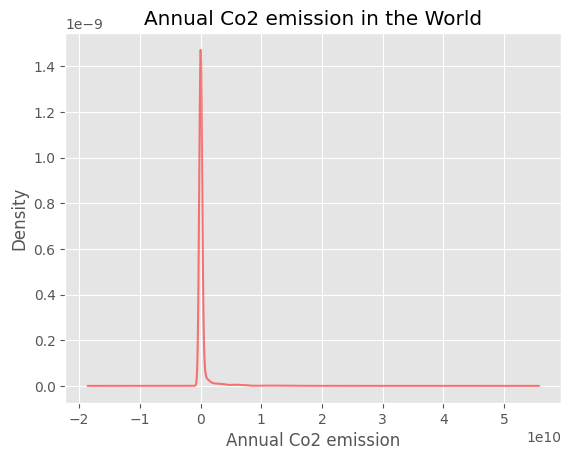

In [28]:
ax = df_emission_region['Annual CO₂ emissions']\
    .plot(kind = 'kde', 
         title = 'Annual Co2 emission in the World',
         color = 'red', 
         alpha = 0.5)
ax.set_xlabel ('Annual Co2 emission')

Step 4: Feature Relationships



In [29]:
df =    df_emission_region

fig = px.choropleth(
    df_emission_region,
    locations='Country',
    locationmode='country names',
    color='Annual CO₂ emissions',
    hover_name='Country',
    animation_frame='Year',  # If you have multiple years
    projection='natural earth',
    title='Annual CO₂ Emissions per Capita by Country'
)


fig.show()

In [30]:
# Map Analysis Annual Co2 Emission by Region

df =    df_emission_region

fig = px.scatter_geo(
    df,
    locations='Code',
    locationmode='ISO-3', # define the location using country code
    color='Annual CO₂ emissions',
    size = 'Annual CO₂ emissions',
    hover_name= 'Country',
    animation_frame='Year',  # If you have multiple years
    projection='natural earth',
    title='Annual CO₂ Emissions by Country', 
    #color_continuous_scale = 'Viridis',
    size_max = 50
)


fig.update_geos(
    resolution=50,
    showcoastlines=True, coastlinecolor="RebeccaPurple",
    showland=True, landcolor="LightGreen",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, lakecolor="Blue",
    showrivers=True, rivercolor="Blue")

fig.show()

In [31]:
# Map Anaalysis for Annual Emission Per Capita by Country
df_1 = df_emission_per_cap

fig = px.scatter_geo(
        df_1, 
        locations = 'Country', 
        locationmode = 'country names', # definded the location using country name, 
        color =   'Annual CO₂ emissions (per capita)',
        size =   'Annual CO₂ emissions (per capita)',
        hover_name = 'Country',
        animation_frame = 'Year', 
        projection = 'natural earth', 
        title = 'Annual Co2 Emission Per Capital by Country',
        color_continuous_scale = 'Viridis',
        size_max = 100
)

fig.show()


In [32]:


df_1 = df_emission_per_cap

fig = px.choropleth_mapbox(
   df_1,
    geojson=None,  # If you have GeoJSON data, provide it here
    locations = 'Country', 
    color = 'Annual CO₂ emissions (per capita)',
    hover_name = 'Code',
    animation_frame = 'Year', 
    title = ' Annual Co2 Emission Per Capita by Country', 
    color_continuous_scale = 'Viridis'
)

fig.update_layout(mapbox_style="carto-positron", mapbox_zoom=1)  # You can adjust the zoom level
fig.update_layout(mapbox_center={"lat": 0, "lon": 0})  # Adjust the center coordinates

fig.show()
